### Clustering - Hirarchical, KMeans, DBSCAN

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. 
For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the 
last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different 
segments for different types of mileage offers

#### Data Description

* ID --Unique ID
* Balance--Number of miles eligible for award travel
* Qual_mile--Number of miles counted as qualifying for Topflight status
* Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
* Bonus_trans--Number of non-flight bonus transactions in the past 12 months
* Flight_miles_12mo--Number of flight miles in the past 12 months
* Flight_trans_12--Number of flight transactions in the past 12 months
* Days_since_enrolled--Number of days since enrolled in flier program
* Award--whether that person had award flight (free flight) or not

* cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
* cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
* cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
          1 = under 5,000
          2 = 5,000 - 10,000
          3 = 10,001 - 25,000
          4 = 25,001 - 50,000
          5 = over 50,000


### Import Libraries

In [658]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### The Airlines Datase

In [4]:
df = pd.read_csv('EastWestAirlines.csv')
data=df.copy()

In [5]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data.drop(['ID#'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


### EDA

In [7]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


<AxesSubplot:xlabel='Award?', ylabel='count'>

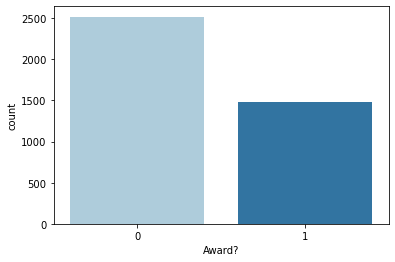

In [10]:
sns.countplot(x = data['Award?'], palette='Paired')

<AxesSubplot:xlabel='Award?', ylabel='Balance'>

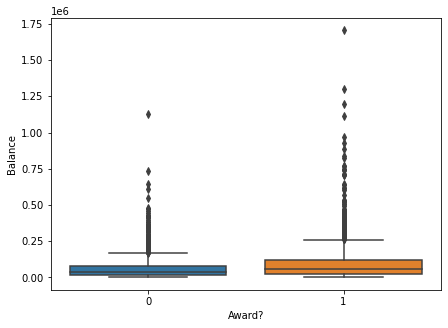

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Award?', y='Balance', data=data)

<AxesSubplot:xlabel='Days_since_enroll', ylabel='Bonus_miles'>

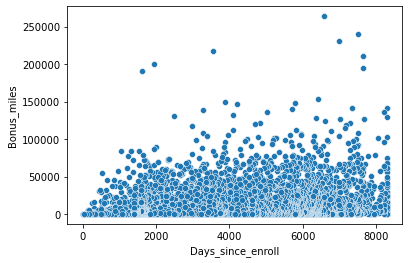

In [642]:
sns.scatterplot(x='Days_since_enroll', y='Bonus_miles', data=data)

<AxesSubplot:xlabel='Bonus_miles'>

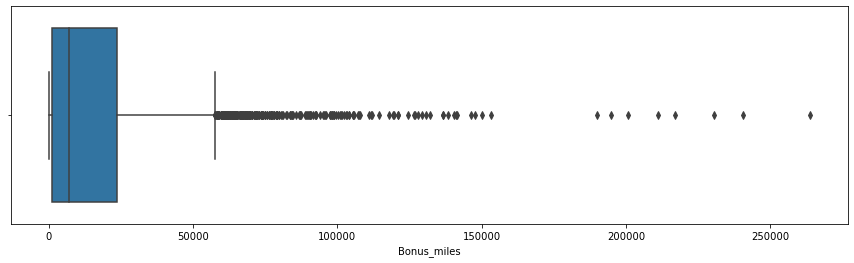

In [653]:
plt.figure(figsize=(15,4))
sns.boxplot(x = data['Bonus_miles'])

### Feature Scaling

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

### Dimensionality Reduction - PCA

In [513]:
pca = PCA()
pca_values = pca.fit_transform(scaled_data)
pca_values

array([[-1.46667427, -0.06718286, -0.80288006, ...,  0.36188524,
         0.06296921, -0.02535285],
       [-1.4505642 , -0.06374317, -0.75202066, ...,  0.29260615,
         0.08156755, -0.01322755],
       [-1.2100507 , -0.13355511, -0.76493683, ...,  0.17906785,
         0.20449964,  0.03528368],
       ...,
       [ 0.17353576, -0.61180929,  0.40847963, ...,  0.3661472 ,
        -0.297811  , -0.08721135],
       [-1.69524058,  0.72653107,  0.43867994, ...,  0.42001773,
        -0.07273255, -0.01601752],
       [-2.10886559,  0.40309321,  0.50768892, ...,  0.43806375,
        -0.01351682, -0.08329668]])

In [514]:
# variance in each pca (amount of information contain by each pca)
var = pca.explained_variance_ratio_
var
#amount of information present in each pca
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 29.87,  45.58,  55.17,  64.35,  73.08,  81.37,  88.7 ,  94.34,
        97.61,  98.87, 100.  ])

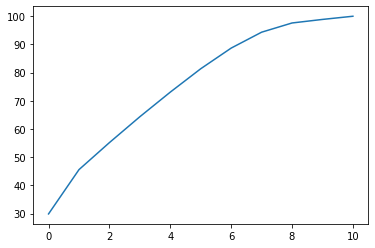

In [515]:
# variance plot
plt.plot(var1)

#first 5 pca contain 82% information

In [516]:
airline_pc = pd.DataFrame(pca_values[:,0:4],columns=['pc1','pc2','pc3','pc4'])

## Hirarchichal Clustering

In [464]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [623]:
# complete linkage method, 3 clusters

hc_comp = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
predict_comp = hc_comp.fit_predict(scaled_data)
silhouette_score(scaled_data, predict_comp)

0.7760836053602842

In [620]:
# ward linkage method, 3 clusters

hc_ward = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
predict_ward = hc_ward.fit_predict(scaled_data)
silhouette_score(scaled_data, predict_ward)

0.2940432062008608

In [606]:
# single linkage method, 3 clusters

hc_single = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
predict_single = hc_single.fit_predict(scaled_data)
silhouette_score(scaled_data, predict_single)

0.7350532148998382

In [607]:
# average linkage method, 3 clusters

hc_avg = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
predict_avg = hc_avg.fit_predict(scaled_data)
silhouette_score(scaled_data, predict_avg)

0.7838667595062349

### Hirarchichal Clustering on PCA Data

In [608]:
# ward linkage method on principal components, 3 clusters

hc_ward_pca = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
predict_ward_pca = hc_ward_pca.fit_predict(airline_pc)
silhouette_score(airline_pc, predict_ward_pca)

0.44511780262052336

In [632]:
# single linkage method on principal components, 3 clusters

hc_single_pca = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
predict_sing_pca = hc_single_pca.fit_predict(airline_pc)
print('3 n_clusters:',silhouette_score(airline_pc, predict_sing_pca))


# single linkage method on principal components, 2 clusters

hc_single_pca1 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')
predict_sing_pca1 = hc_single_pca1.fit_predict(airline_pc)
print('2 n_clusters:',silhouette_score(airline_pc, predict_sing_pca1))


3 n_clusters: 0.783048391854119
2 n_clusters: 0.8863102664927335


In [630]:
# complete linkage method on principal components, 3 clusters

hc_comp_pca = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
predict_comp_pca = hc_comp_pca.fit_predict(airline_pc)
silhouette_score(airline_pc, predict_comp_pca)

0.7898602837267924

In [633]:
# average linkage method on principal components, 3 clusters

hc_avg_pca = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
predict_avg_pca = hc_avg_pca.fit_predict(airline_pc)
print('3 n_clusters:',silhouette_score(airline_pc, predict_avg_pca))


# average linkage method on principal components, 2 clusters

hc_avg_pca1 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'average')
predict_avg_pca1 = hc_avg_pca1.fit_predict(airline_pc)
print('2 n_clusters:',silhouette_score(airline_pc, predict_avg_pca1))

3 n_clusters: 0.8031141180511974
2 n_clusters: 0.850575362094636


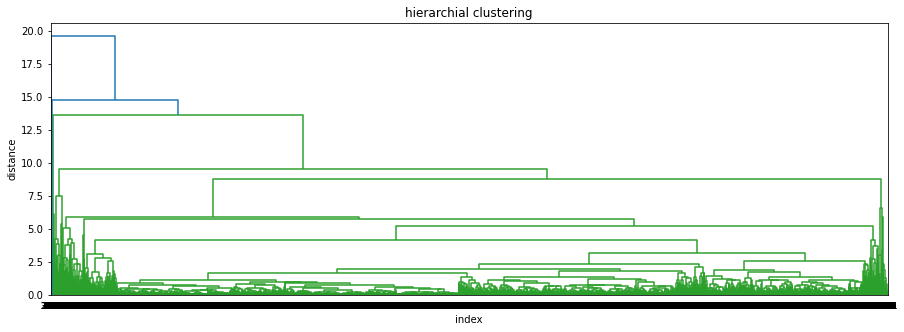

In [601]:
y = sch.linkage(airline_pc,method='average', metric="euclidean")
plt.figure(figsize=(15,5))
plt.title("hierarchial clustering")
plt.xlabel('index')
plt.ylabel('distance')
sch.dendrogram(y,leaf_rotation=0,leaf_font_size=8)
plt.show()

In [657]:
import collections
collections.Counter(predict_comp)

Counter({0: 3980, 2: 15, 1: 4})

## KMeans Clustering

In [468]:
from sklearn.cluster import KMeans

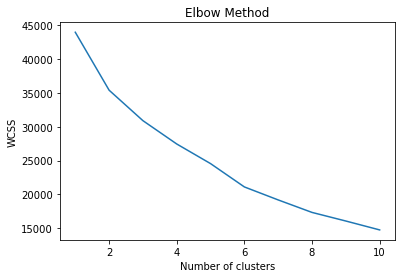

In [469]:
#decide number of clusters
wcss = []  #within cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [470]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [471]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [472]:
data['clusterid_new'] = clusters_new.labels_

In [473]:
data['clusterid_new'].value_counts()

1    2532
3    1239
0     170
2      43
4      15
Name: clusterid_new, dtype: int64

In [474]:
clusters_new.cluster_centers_

array([[ 1.13984539,  1.05672065,  0.09776869, -0.09824189, -0.06276658,
         0.57151541,  1.51103346,  3.44127553,  3.6610428 ,  0.27107706,
         0.88975067],
       [-0.29035586, -0.05818754, -0.59651518, -0.09824189, -0.06074586,
        -0.51420592, -0.49040819, -0.18783605, -0.19980876, -0.20213465,
        -0.34539972],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.43260424, -0.01954084,  1.22083157, -0.09824189, -0.05447771,
         0.94096329,  0.75568144, -0.09151819, -0.10212979,  0.37689814,
         0.58013031],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [475]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dbscanid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,188455.641176,961.558824,2.194118,1.000000,1.000000,30945.770588,26.111765,5277.958824,15.258824,4678.300000,0.800000,-1.000000
1,1,44293.077409,98.530806,1.237362,1.000000,1.000395,4722.390205,6.885861,196.838468,0.614929,3699.326619,0.202607,-0.099526
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,-1.000000
3,3,117119.906376,130.094431,3.736077,1.000000,1.001614,39793.209040,18.843422,332.092010,0.987086,4897.692494,0.651332,-0.715900
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,-1.000000


In [476]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data,clusters_new.labels_)

0.32490482900380546

### KMeans on PCA Data

In [580]:
# build a model with 3 clusters
kmeans_pca = KMeans(n_clusters=4)
kmeans_pca.fit(airline_pc)

KMeans(n_clusters=4)

In [581]:
silhouette_score(airline_pc,kmeans_pca.labels_) 

0.4722279326676901

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

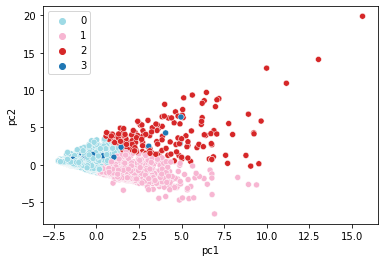

In [582]:
sns.scatterplot(x='pc1', y='pc2', hue=kmeans_pca.labels_, data=airline_pc, palette='tab20_r')

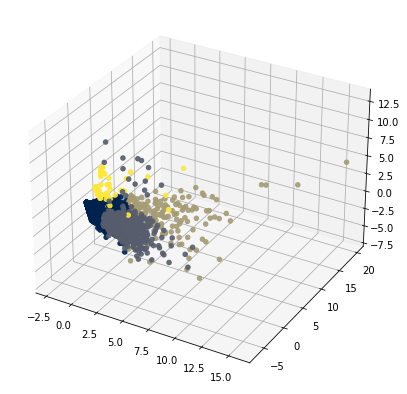

In [583]:
# 3D visualization
plt.figure(figsize=(10,7))

ax = plt.axes(projection='3d')
xdata = airline_pc.pc1
ydata = airline_pc.pc2
zdata = airline_pc.pc3
ax.scatter3D(xdata, ydata, zdata, c=kmeans_pca.labels_,cmap='cividis',alpha=0.9)
plt.show()

## DBSCAN

In [182]:
from sklearn.cluster import DBSCAN

In [286]:
dbsc = DBSCAN(eps=0.4, min_samples=15)
dbsc.fit(scaled_data)

DBSCAN(eps=0.4, min_samples=15)

In [287]:
data['dbscanid']=pd.DataFrame(dbsc.labels_)

In [288]:
data['dbscanid'].value_counts()

-1    2417
 0    1259
 3      93
 2      80
 6      47
 4      42
 1      36
 5      25
Name: dbscanid, dtype: int64

In [289]:
silhouette_score(data,dbsc.labels_)

-0.32181694733102556

### DBSCAN on PCA Data

In [347]:
def dbscan(X, eps, min_samples):
    #ss = StandardScaler()
    #X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    airline_pc['pred'] = y_pred
    plt.figure(figsize=(12,4))
    plt.scatter(airline_pc.iloc[:,0], airline_pc.iloc[:,1],c=y_pred, cmap='nipy_spectral_r', alpha=0.6)
    plt.title("DBSCAN")
    print(eps,':', silhouette_score(airline_pc,db.labels_))

0.1 : 0.10635761639455286
0.2 : 0.24331499838517745
0.3 : 0.34172690658217303
0.4 : 0.3917364378796554
0.5 : 0.45602152542798735
0.6 : 0.4829873785078206
0.7 : 0.4671941581151276
0.8 : 0.4420632624023077
0.9 : 0.48691748453500616
1 : 0.49419871615756916
1.1 : 0.4977353898606883
[None, None, None, None, None, None, None, None, None, None, None]


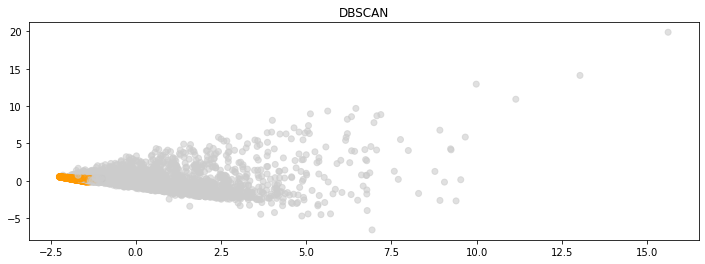

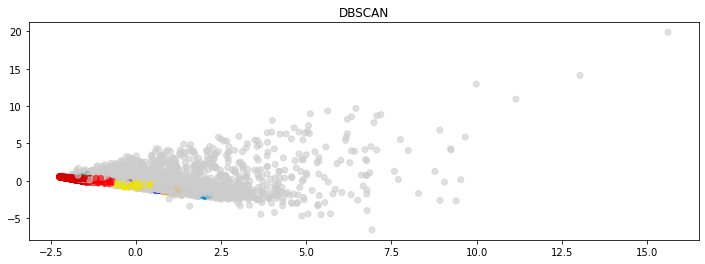

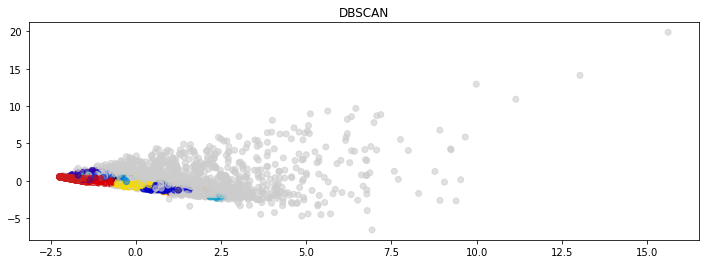

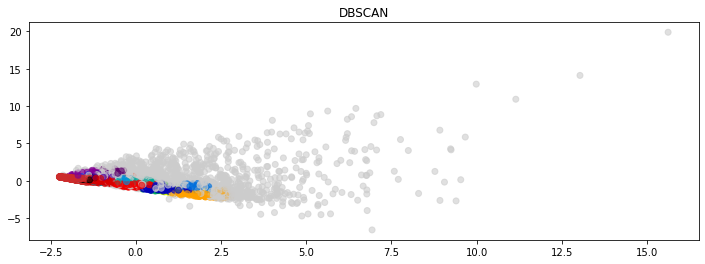

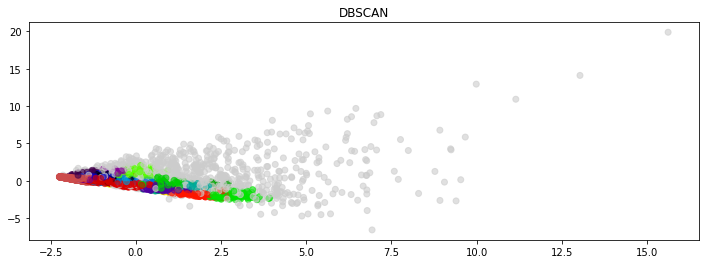

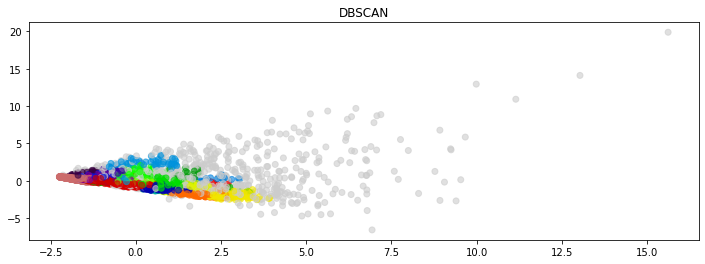

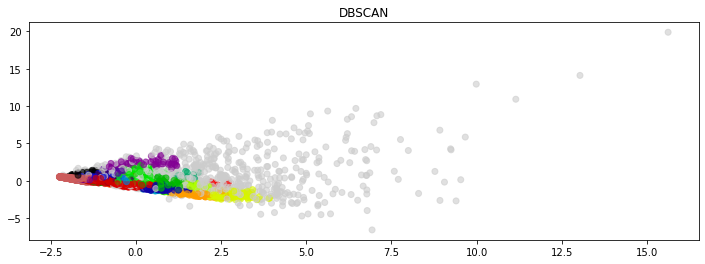

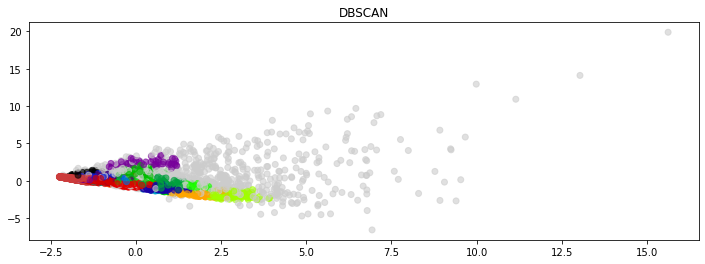

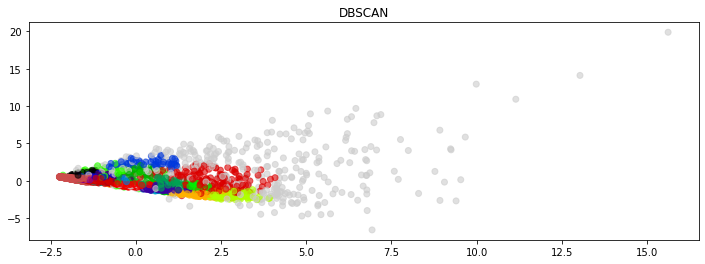

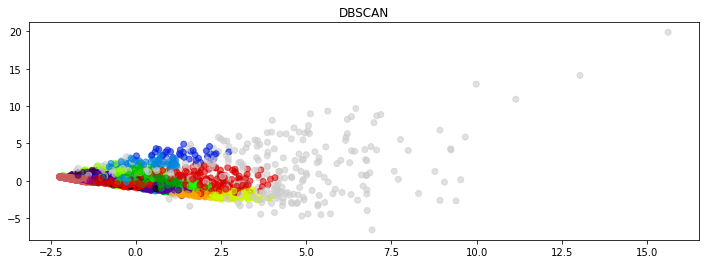

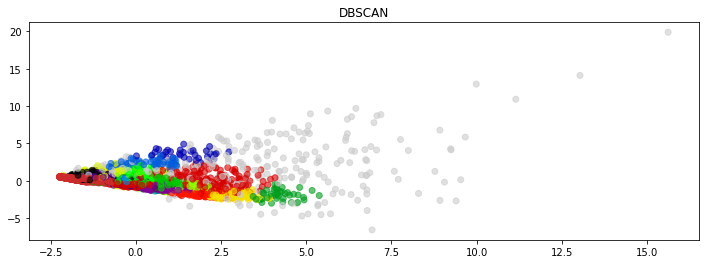

In [353]:
alpha = [0.1, 0.2 ,0.3 ,0.4 ,0.5 ,0.6 ,0.7 ,0.8 ,0.9, 1, 1.1] #esp values
min_samp = [10,12,14,16,12,10,14,18,15,12,10] # min_samples values
database=[airline_pc for i in range(0,11)] # pca data

# find best esp value
result=list(map(dbscan,database,alpha,min_samp))
print(result)

In [351]:
# Pointwise  Visualization 
import plotly.express as px
    
fig = px.scatter(airline_pc, x="pc2", y="pc1",hover_name='pred',color='pred',size_max=60,opacity=0.7)
fig.update_layout(
     height=800)
fig.show()

After applying of different type of hierarchical clustering & Kmeans method we found that kmeans clustering is sensitive for outlier but giving high silhouette score & hierarchical clusterical are way more complex to understable. Dbscan performs well on this dataset.

Thank you!